### Simualting BlackJack

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from game import Game
import time

Elapsed time: 179 seconds


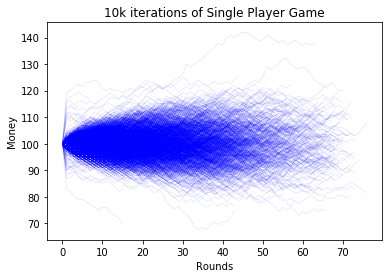

In [15]:
start = time.time()
game = Game(1, 100, 1, 8, "warning")
m = []
last_m = []
money = [100]
round_ = 0
# figure = plt.figure(figsize=(12, 15))
while round_ < int(1e5):
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        round_ += 1
        if game.play_round():
            money.append(game.players[0].money)
        else:
            plt.plot(money, 'b-', alpha=0.15, linewidth=0.5)
            m.append(money)
            last_m.append(money[-1])
            game = Game(1, 100, 1, 8, "warning")
            money = [100]
    else:
        plt.plot(money, 'b-', alpha=0.10, linewidth=0.5)
#         time.sleep(1)
        game = Game(1, game.players[0].money, 1, 8, "warning")
        money = [100]
plt.title("10k iterations of Single Player Game")
plt.xlabel("Rounds")
plt.ylabel("Money")
end = time.time()
print("Elapsed time: {} seconds".format(int(end-start)))

Mean of the experiments: 99.96658195679797
Variance of the experiments: 34.19526188750163


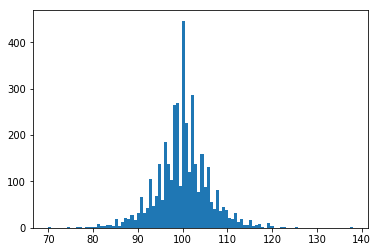

In [36]:
# last_m = np.array(last_m)
print("Mean of the experiments: {}".format(last_m.mean()))
print("Variance of the experiments: {}".format(last_m.var()))
fig = plt.hist(last_m, bins=100)

In [4]:
game = Game(1, 100, 1, 8, "warning")
money = []
status = []
round_ = 0
while round_ < int(1e2):
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        round_ += 1
        if game.play_round():
            money.append(game.players[0].money)
            for hand in game.players[0].hands:
                status.append(hand.status)
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")

Text(0,0.5,'Money')

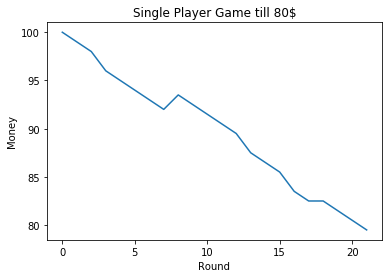

In [5]:
game = Game(1, 100, 1, 8, "warning")
xlist = [100]
# keep playing as long as money is above 80
while game.players[0].money > 80:
    # keep playing if there is card
    if game.index < game.cut_card and game.index < game.deck_length:
        game.round += 1
        if game.play_round():
            xlist.append(game.players[0].money)
        else:
            game = Game(1, game.players[0].money, 1, 8, "warning")
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")
plt.plot(xlist)
plt.title("Single Player Game till 80$")
plt.xlabel("Round")
plt.ylabel("Money")

Text(0,0.5,'Money')

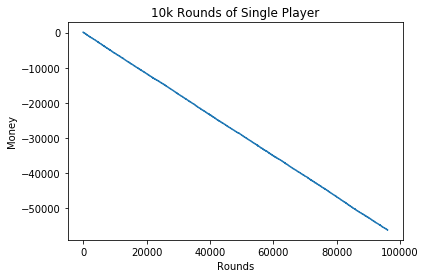

In [6]:
game = Game(1, 100, 1, 8, "warning")
xlist = list()
i = 0
while i < 1e5:
    if game.index < game.cut_card and game.index < game.deck_length:
        i += 1
        game.round += 1
        # print("i:{}\tround:{}".format(i, game.round))
        if game.play_round():
            xlist.append(game.players[0].money)
        else:
            game = Game(1, game.players[0].money, 1, 8, "warning")
    else:
        game = Game(1, game.players[0].money, 1, 8, "warning")
plt.plot(xlist)
plt.title("10k Rounds of Single Player")
plt.xlabel("Rounds")
plt.ylabel("Money")